<a href="https://colab.research.google.com/github/katsuki-nagakubo/Tweets_Word2vec/blob/master/trump_tweets_s%26p500_relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#データの取得と成形

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#https://teratail.com/questions/128725

from ast import literal_eval
from pprint import pprint

f = open('/trump_tweets.txt', 'r')
text = f.read()
mylist = literal_eval(text)

print(type(mylist), type(mylist[0]))

<class 'list'> <class 'dict'>


In [3]:
df_text=[]
df_created_at=[]
df_id_str=[]

print(len(mylist),"tweets")

for i in range(len(mylist)):
    text = mylist[i]["text"]
    created_at = mylist[i]["created_at"]
    id_str = mylist[i]["id_str"]
    df_text.append(text)
    df_created_at.append(created_at)
    df_id_str.append(id_str)

tweet_list=[df_created_at,df_id_str,df_text]
#print(tweet_list)

17544 tweets


In [0]:
#https://ai-inter1.com/pandas-dataframe_basic/
#リスト型にしたデータをPandasでDataFrameにした

columns1=["created_at"]
tweet_data = pd.DataFrame( data = df_created_at, columns = columns1)
tweet_data["id"]=df_id_str
tweet_data["text"] = df_text

In [0]:
#https://teratail.com/questions/132333
#https://note.nkmk.me/python-pandas-datetime-timestamp/

tweet_data["time_created_at"] = pd.to_datetime(tweet_data['created_at'])
tweet_data["date_created_at"] = tweet_data["time_created_at"].dt.date
tweet_data["key"]=pd.to_datetime(tweet_data["date_created_at"])

In [0]:
# https://www.macrotrends.net/2488/sp500-10-year-daily-chart

sp_data = pd.read_csv('/sp500-10-year-daily-chart.csv')
sp_data["date_64"] = pd.to_datetime(sp_data["date"])
sp_data["key"] =sp_data["date_64"] 

In [7]:
#内部結合
#http://pppurple.hatenablog.com/entry/2016/06/27/022310#inner-join
#https://note.nkmk.me/python-pandas-merge-join/

tweet_data=pd.merge(tweet_data, sp_data)
tweet_data.columns
data = tweet_data[["key"," value","text"]]

#行の名前を変更する　20200505
data = data.rename(columns={"key": "date"," value":"price"})
data.head()

,date,price,text
0,2020-05-01,2830.71,RT @StevenTDennis: Trump gets bump in latest G...
1,2020-05-01,2830.71,"The Governor of Michigan should give a little,..."
2,2020-05-01,2830.71,"Cryin Chuck Schumer, compared to what other Se..."
3,2020-05-01,2830.71,Cryin’ Chuck Schumer was on a late night show ...
4,2020-05-01,2830.71,RT @TeamTrump: President @realDonaldTrump: “We...


In [8]:
# trumpが大統領になった2017年1月20日から、GW前2020年5月1日までのデータを分析する
# https://qiita.com/mSpring/items/6ec1ab28dcb261db2c73

import datetime as dt
data2 = data[(data['date'] >= dt.datetime(2017,1,20)) & (data['date'] <= dt.datetime(2020,5,1))]
print( "2017/01/20 - 2020/05/01のツイート数は", len(data2))

2017/01/20 - 2020/05/01のツイート数は 12259


In [0]:
#新しいデータを追加すると上書き保存されるようにmode="a"にした。

#初回だけ,headerはTrue
data2.to_csv("s&p_tweets.csv", index=False, mode='a', header=True)
#2回目以降はFalse
#data2.to_csv("s&p_tweets.csv", index=False, mode='a', header=False)

In [10]:
# Fileを読み込むことで最新のデータで分析できる

data = pd.read_csv("s&p_tweets.csv")
print( len(data),"tweets")

12259 tweets


In [11]:
#形態素解析
#https://yottagin.com/?p=4360

import nltk

tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
for tweet in data["text"][:1]:
    print (tweet_tokenizer.tokenize(tweet))

['rt', ':', 'trump', 'gets', 'bump', 'in', 'latest', 'gallup', 'poll', ':', '49', '%', 'approval', '(', '+', '6', ',', 'tied', 'for', 'his', 'best', ')', '47', '%', 'disapproval', '(', '-', '7', ')']


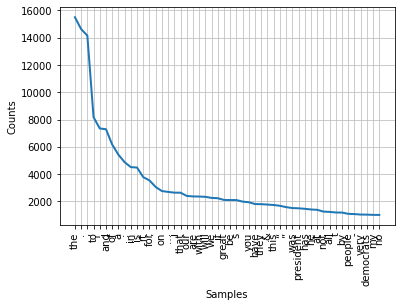

In [12]:
words = []
for tweet in data["text"]:
    words += tweet_tokenizer.tokenize(tweet)

fdist = nltk.FreqDist(words)
fdist.plot(50)

In [13]:
#高頻度のツイートを表示
df_fdist = pd.DataFrame(fdist.most_common(10), columns=['Word', 'Frequency'])
df_fdist

,Word,Frequency
0,the,15504
1,.,14634
2,",",14156
3,to,8172
4,!,7343
5,and,7289
6,of,6165
7,a,5419
8,:,4870
9,in,4507


In [0]:
#tokenにする
import re
import string

stemmer = nltk.stem.PorterStemmer()
punctuations = string.punctuation
all_tweets_clean = []

#Tweet毎にリスト形式で保存するための加工
result=[]

for tweet in data["text"]:
    # RTから始まる部分を取り除く。
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # リンクを取り除く。
    tweet = re.sub(r'(http|https):\/\/.*[\r\n]*', '', tweet)
    # ハッシュタグを取り除く。
    tweet = re.sub(r'#', '', tweet)
    # 句読点の削除
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) 
    # 単語に分解する。
    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    result.append(tweet_tokens)

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stopwords = nltk.corpus.stopwords.words('english')
stop_words = ["→", "←", "?", "」", "「","(",")","!",".",",","&","…","%",":",";","“"]
stopwords += stop_words

#print(stopwords)

result_2=[]
result_3=[]
for i in range(len(result)):
    for word in result[i]:
        if word not in stopwords:
            result_2.append(word)
    result_3.append(result_2)
    result_2=[]

In [17]:
#Word2Vec

from gensim.models import word2vec

# 対象データをLinseSentence(one sentence = one lineとして扱う)で読み込む

sentences = result_3
sentences[0]

['steventdennis',
 'trump',
 'gets',
 'bump',
 'latest',
 'gallup',
 'poll',
 '49',
 'approval',
 '6',
 'tied',
 'best',
 '47',
 'disapproval',
 '7']

In [0]:
# skip-gramモデルの学習
skipgram_model = word2vec.Word2Vec(sentences,
                                   sg=1,
                                   size=300,
                                   min_count=10,
                                   window=15, seed=1234)

In [19]:
# 作成したモデルの保存
skipgram_model.save("skipgram_w2v.model")
# saveしたモデルを読み込む時は
#skipgram_model = word2vec.Word2Vec.load("./skipgram_w2v.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
# coronavirusと似たキーワードを見つけていきます。
# ここで記載しているscoreは、単語同士のコサイン類似度です。
pd.DataFrame(skipgram_model.wv.most_similar(
    positive=["coronavirus"]), columns=["keyword", "score"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,keyword,score
0,response,0.835616
1,covid,0.829259
2,task,0.824068
3,spread,0.820951
4,19,0.800288
5,outbreak,0.786180
6,briefing,0.781547
7,providing,0.773460
8,force,0.769582
9,school,0.766052


In [0]:
"""
1. 抽出された各単語を、作成したword2Vecによってベクトル化
2. 変換された各単語ベクトルの平均をとり、その結果得られたベクトルを記事のベクトルとする
上記2ステップを実行する関数を作成
"""

num_features = 300


def avg_document_vector(data, num_features):
    document_vec = np.zeros((len(data), num_features))
    for i, doc_word_list in enumerate(data):
        feature_vec = np.zeros((num_features,), dtype="float32")
        for word in doc_word_list:
            try:
                feature_vec = np.add(
                    feature_vec, skipgram_model.wv.__getitem__(word))
            except:
                pass

        feature_vec = np.divide(feature_vec, len(doc_word_list))
        document_vec[i] = feature_vec
    return document_vec

In [22]:
X = avg_document_vector(data=sentences, num_features=300)
X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


(12259, 300)

In [23]:
# outer join
data2 = pd.DataFrame(X)
df_tweets_word2vec =  pd.concat([data, data2], axis=1)
df_tweets_word2vec.head()

,date,price,text,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,2020-05-01,2830.71,RT @StevenTDennis: Trump gets bump in latest G...,-0.033722,-0.052231,0.031549,-0.078243,0.000770,-0.048450,0.032813,-0.019918,0.037816,-0.005337,0.083069,0.056093,-0.009462,0.051785,0.071403,-0.066669,0.033402,-0.059360,0.027567,-0.079046,0.134210,-0.064413,0.100663,-0.034796,-0.043034,0.059084,0.027567,0.037882,-0.032111,0.086116,-0.091834,-0.018012,0.029881,-0.027474,0.087275,0.049218,0.075562,...,-0.054954,-0.023929,0.009900,-0.041562,-0.074528,-0.075461,-0.051013,0.041828,0.012422,-0.067285,0.003117,0.035158,0.021010,-0.023286,-0.012334,0.014039,0.034358,0.028302,0.015878,-0.048713,-0.019450,0.090321,-0.072205,0.011214,-0.005696,-0.053230,-0.005501,0.094620,-0.070027,-0.013589,-0.067686,0.042000,-0.030714,-0.103973,0.014148,0.004731,-0.024772,-0.118913,0.052698,0.049125
1,2020-05-01,2830.71,"The Governor of Michigan should give a little,...",-0.036647,0.041489,0.010204,-0.022369,-0.020424,0.049096,0.099668,-0.074999,0.059530,-0.041086,0.113543,0.051714,0.000708,0.071218,0.087102,-0.086096,-0.033424,-0.137899,0.057882,-0.201172,0.124632,-0.062735,0.144932,-0.082693,-0.051375,0.054735,0.022958,-0.029838,0.021259,0.127200,-0.107877,0.072541,0.060802,-0.036716,0.097123,-0.028362,0.019372,...,0.061534,-0.010589,0.004234,-0.134861,-0.072415,-0.063040,0.088591,0.086438,0.009997,-0.215676,0.081217,0.031562,0.070262,-0.105783,0.008504,-0.060873,0.075988,0.028410,0.018317,-0.161207,-0.226248,0.175705,-0.138905,0.088015,0.053725,-0.111423,0.096782,0.173728,-0.081938,0.040121,0.016706,0.053872,0.015246,-0.041653,-0.017644,0.126356,-0.045308,-0.121933,0.062904,0.067198
2,2020-05-01,2830.71,"Cryin Chuck Schumer, compared to what other Se...",0.014982,0.045090,0.023078,-0.059340,-0.018488,0.060744,0.087310,-0.055616,0.083869,-0.015927,0.090402,0.045593,0.017218,0.117739,0.128638,-0.103528,-0.017470,-0.120158,0.044262,-0.254628,0.159664,-0.090271,0.134776,-0.123516,-0.049971,0.034087,0.057528,-0.040350,-0.009933,0.085631,-0.108299,0.029297,0.009238,-0.020091,0.081078,-0.023113,0.016928,...,0.025335,-0.019320,0.051884,-0.151104,-0.073761,-0.046733,0.056129,0.081738,0.018287,-0.219807,0.068099,0.043162,0.079392,-0.075648,-0.003618,-0.053346,0.073823,0.028656,-0.009653,-0.155535,-0.183015,0.157902,-0.112295,0.078480,0.030189,-0.121250,0.088801,0.162157,-0.067693,-0.008526,-0.009387,0.102404,0.032571,-0.041832,0.025964,0.119291,-0.043702,-0.092308,0.026043,0.061015
3,2020-05-01,2830.71,Cryin’ Chuck Schumer was on a late night show ...,-0.002104,0.065582,0.017794,-0.054467,0.011233,0.044628,0.084898,-0.058003,0.074700,-0.013663,0.111725,0.046313,0.026080,0.130613,0.115007,-0.088574,-0.022127,-0.128930,0.026464,-0.238204,0.189992,-0.067643,0.144450,-0.120471,-0.032787,0.013642,0.074245,-0.045633,-0.000839,0.097308,-0.121511,0.055759,0.024114,-0.021440,0.107974,0.004710,0.037452,...,0.036107,-0.056300,0.037594,-0.144561,-0.052924,-0.024372,0.063518,0.071654,0.043217,-0.171554,0.063769,-0.005029,0.049516,-0.057844,-0.016454,-0.034203,0.042900,0.020425,-0.023147,-0.149889,-0.163800,0.150810,-0.101800,0.062049,0.018673,-0.127373,0.092327,0.132228,-0.072466,-0.009899,-0.038347,0.107349,0.034907,-0.042211,-0.008054,0.116174,-0.048236,-0.098998,0.047396,0.057850
4,2020-05-01,2830.71,RT @TeamTrump: President @realDonaldTrump: “We...,-0.060735,-0.006707,0.014117,-0.074490,0.006992,-0.075251,0.049211,-0.058906,0.084963,-0.044185,0.095325,0.057041,0.002285,0.034595,0.064871,-0.084918,-0.008324,-0.094148,-0.000915,-0.140112,0.185396,-0.093293,0.176057,-0.072922,-0.032983,0.079073,0.041452,0.039801,-0.011171,0.125910,-0.143265,0.006805,0.081980,0.014611,0.117812,0.018247,0.094404,...,-0.052750,-0.023226,0.003160,-0.087528,-0.109727,-0.067906,0.016657,0.049608

In [0]:
df_tweets_word2vec.to_csv("price_tweets_vector.csv", index=False)

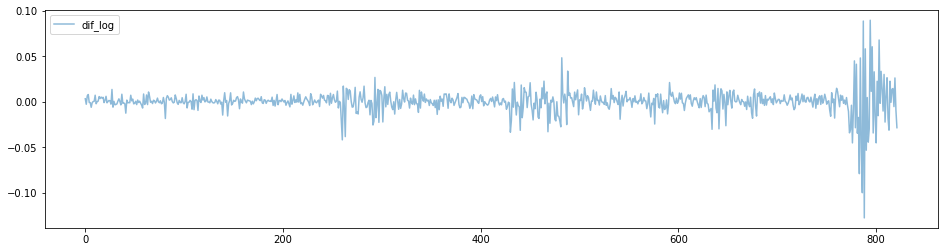

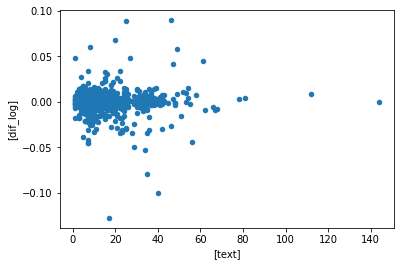

In [25]:
#ツイートのベクトルを1日毎に平均にする（1日10ツイートだった場合ベクトルと足し合わせ10で割る）
# groupby #https://qiita.com/propella/items/a9a32b878c77222630ae
df = df_tweets_word2vec.groupby(["date"]).mean()


# targetのcolである変化率（"price"の差分対数行列）をdateをKeyに内部結合する
df_sp = pd.read_csv("/sp500-10-year-daily-chart.csv")

# 時系列データの差分を求める

# " value"の行を対数化
# https://www.sejuku.net/blog/70027
df_sp["log"] = np.log(df_sp[" value"])

# "log"の1日前との差を取って、差分対数の列を作成
# https://note.nkmk.me/python-pandas-diff-pct-change/
df_sp["dif_log"] = df_sp["log"].diff()

#内部結合
df2=pd.merge(df_sp, df, how="inner" ,on="date")
df2 = df2.drop(" value", axis=1)

# groupbyを使って1日のツイート数も特徴量に加える
# https://deepage.net/features/pandas-count.html
df3 = df_tweets_word2vec[["date","text"]]
df3 = df3.groupby(["date"]).count()

#内部結合
df4 = pd.merge( df3, df2, how="inner" ,on="date")

#日付データの形を変える
df4["date"] = pd.to_datetime(df4['date']).astype('int64')

#変化率のグラフ
df4.plot( y=["dif_log"], figsize=(16,4), alpha=0.5)

#ツイート数と変化率の関係
df4.plot.scatter(x=["text"], y=["dif_log"])

In [26]:
df4.head()

,date,text,log,dif_log,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,1484870400000000000,13,7.728112,0.003361,2271.31,-0.053486,0.005904,0.060970,-0.074558,-0.002691,0.011675,0.072612,-0.030471,0.022120,-0.087198,0.099142,0.023609,-0.001299,0.063077,0.088095,-0.084875,0.002924,-0.145438,0.056159,-0.144321,0.099506,-0.037431,0.136447,-0.021234,-0.106271,0.130516,0.038699,0.014093,-0.043205,0.136886,-0.100457,0.062842,0.102803,-0.004551,0.084342,...,0.012340,-0.002098,0.014406,-0.087161,-0.124336,-0.131264,0.030041,0.092615,-0.027768,-0.231293,0.079464,0.067410,0.095681,-0.116044,0.011933,-0.068452,0.071728,0.017341,0.073118,-0.114663,-0.161629,0.201848,-0.155153,0.074513,0.043941,-0.054021,0.080086,0.196506,-0.057820,0.014542,-0.019452,-0.014806,-0.005860,-0.064539,0.006192,0.053873,-0.049663,-0.144867,0.044149,0.067591
1,1485129600000000000,1,7.725418,-0.002694,2265.20,-0.061980,0.000723,0.028269,-0.039235,0.004370,-0.022080,0.062184,-0.055661,0.033476,-0.101731,0.109844,0.064143,0.007937,0.078943,0.074096,-0.120381,0.049009,-0.182570,0.038232,-0.175091,0.137137,-0.047800,0.116123,-0.025502,-0.114975,0.095080,0.046566,0.035750,-0.017492,0.169548,-0.138206,0.055122,0.108440,-0.020286,0.091829,...,0.027120,-0.022663,0.052859,-0.057164,-0.110675,-0.085487,0.076648,0.078529,-0.023219,-0.135580,0.082300,0.061017,0.061830,-0.076346,-0.014865,-0.055308,0.067918,0.032718,0.093162,-0.128837,-0.108949,0.133430,-0.125877,0.087577,0.046458,-0.061581,0.083103,0.152240,-0.072997,-0.009819,-0.029029,-0.027520,-0.021646,-0.118262,-0.018476,0.041305,-0.028137,-0.179370,0.076276,0.092361
2,1485216000000000000,4,7.731961,0.006543,2280.07,-0.043427,0.020721,0.035035,-0.015234,0.007187,-0.003112,0.053928,-0.036457,0.015578,-0.135905,0.073922,0.053013,0.016730,0.046495,0.046274,-0.106543,0.038599,-0.180691,0.002524,-0.132213,0.061723,-0.030567,0.118815,-0.005039,-0.092471,0.101039,0.058345,0.030483,-0.027190,0.164931,-0.103053,0.073672,0.102344,0.004895,0.041785,...,0.013866,-0.000965,0.050584,-0.028681,-0.093429,-0.068308,0.068104,0.068675,-0.019662,-0.117829,0.079387,0.034798,0.030553,-0.055849,-0.017778,-0.059300,0.025560,-0.008403,0.072997,-0.060182,-0.080416,0.118420,-0.098485,0.054394,0.016674,-0.040012,0.078069,0.103620,-0.048806,0.018180,-0.036456,-0.056547,0.004364,-0.082550,-0.040654,0.028729,-0.049542,-0.141206,0.045956,0.058768
3,1485302400000000000,8,7.739955,0.007994,2298.37,-0.020381,0.017861,0.032496,-0.060627,-0.006332,0.004963,0.056850,-0.036438,0.021849,-0.065144,0.103334,0.039353,0.020922,0.120274,0.083154,-0.104498,0.050276,-0.154121,0.036853,-0.172846,0.151676,-0.019691,0.117853,-0.047567,-0.106658,0.079896,0.067598,-0.005109,-0.022848,0.136981,-0.116109,0.053521,0.052886,0.001450,0.095090,...,0.030793,-0.031364,0.036541,-0.070062,-0.085421,-0.065196,0.056184,0.073987,-0.009360,-0.111054,0.039328,0.036295,0.055320,-0.046447,-0.007311,-0.036013,0.013771,0.000099,0.012536,-0.115695,-0.072669,0.123654,-0.099398,0.038641,0.006566,-0.064355,0.072456,0.130251,-0.055568,-0.024273,-0.062752,0.015435,0.005772,-0.117435,0.012992,0.049296,-0.046351,-0.104743,0.072154,0.054988
4,1485388800000000000,11,7.739220,-0.000736,2296.68,-0.034497,0.021809,0.041530,-0.042662,0.005042,-0.013540,0.040304,-0.019915,0.026746,-0.073738,0.111470,0.048754,0.034765,0.090715,0.071304,-0.102861,0.028296,-0.134556,0.023576,-0.158231,0.128428,-0.029810,0.131679,-0.037412,-0.091347,0.075382,0.073322,0.022277,-0.035414,0.112680,-0.113120,0.054826,0.066537,-0.006993,0.091724,...,0.004792,-0.031634,0.009335,-0.069534,-0.089219,-0.058505,0.056699,0.055706,-0.007129,-0.118329,0.065844,0.041473,0.060269,-0.054653,-0.002596,-0.046333,0.033141,0.016791,0.033808,-0.088077,-0.083739,0.131931,-0.108365,0.029490,0.018200,-0.041719,0.077241,0.109184,-0.0600

In [0]:
#特徴量とターゲットを決める
from sklearn.model_selection import train_test_split

target_col = 'dif_log'
exclude_cols = ['log', 'price', 'dif_log',"date"]
feature_cols = []
for col in df4.columns:
    if col not in exclude_cols:
        feature_cols.append(col)
        
X = np.array(df4[feature_cols])
y = np.array(df4[target_col])

In [28]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1234)

# 参考：分割後のデータ数を確認
print('X_train Features Shape: ', X_train.shape)
print('y_train Target Shape: ', y_train.shape)
print('X_val Features Shape: ', X_val.shape)
print('y_val Target Shape: ', y_val.shape)

X_train Features Shape:  (575, 301)
y_train Target Shape:  (575,)
X_val Features Shape:  (247, 301)
y_val Target Shape:  (247,)


In [0]:
#分析用のライブラリ

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression  # 線形回帰モデルのライブラリ
from sklearn.metrics import mean_squared_error  # MSEのライブラリ
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Accuracy, Precision/Recall/F-score/Support, Confusion Matrix を表示
def show_evaluation_metrics(y_true, y_pred):
    print("Accuracy:")
    print(accuracy_score(y_val, y_pred))
    print()

    print("Report:")
    print(classification_report(y_val, y_pred))

    print("Confusion matrix:")
    print(confusion_matrix(y_val, y_pred))

In [31]:
#分析1 Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_mse = mean_squared_error(y_val, y_pred)
print('RandomForestRegressor RMSE: ', round(np.sqrt(rf_mse), 3))

RandomForestRegressor RMSE:  0.012


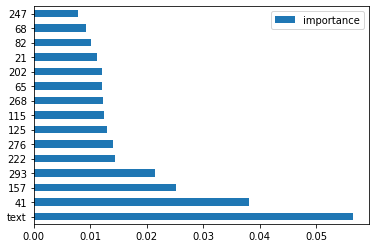

In [32]:
#分析1 Random Forest の Importance
rf_importances = pd.DataFrame(rf.feature_importances_, columns=['importance'], index=feature_cols)
rf_importances.sort_values('importance', ascending=False).iloc[0:15].plot(kind='barh')